In [19]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests 

In [20]:
data = pd.read_csv('ab_browser_test.csv')

In [21]:
data_con = data[data['slot'] == 'control']
data_exp = data[data['slot'] == 'exp']

In [22]:
round((data_exp['n_clicks'].sum() / data_con['n_clicks'].sum() - 1) * 100, 3)

1.614

---

In [23]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [24]:
con_median_scores = list(map(np.median, get_bootstrap_samples(data_con['n_clicks'].values, 1000)))
exp_median_scores = list(map(np.median, get_bootstrap_samples(data_exp['n_clicks'].values, 1000)))

con_mean_scores = list(map(np.mean, get_bootstrap_samples(data_con['n_clicks'].values, 1000)))
exp_mean_scores = list(map(np.mean, get_bootstrap_samples(data_exp['n_clicks'].values, 1000)))

In [25]:
print("95% confidence interval for the CON median repair time:",  stat_intervals(con_median_scores, 0.05))
print("95% confidence interval for the EXP median repair time:",  stat_intervals(exp_median_scores, 0.05))

print("95% confidence interval for the CON mean repair time:",  stat_intervals(con_mean_scores, 0.05))
print("95% confidence interval for the EXP mean repair time:",  stat_intervals(exp_mean_scores, 0.05))

95% confidence interval for the CON median repair time: [4. 4.]
95% confidence interval for the EXP median repair time: [5. 5.]
95% confidence interval for the CON mean repair time: [11.20129844 11.3543613 ]
95% confidence interval for the EXP mean repair time: [11.51353328 11.65791995]


---

In [35]:
np.random.seed(0)
bootstrap_samples = get_bootstrap_samples(data_con['n_clicks'].values, 500)

In [54]:
means = np.mean(bootstrap_samples, axis=1)
se = np.sum((bootstrap_samples.T - means) ** 2, axis=0)

((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

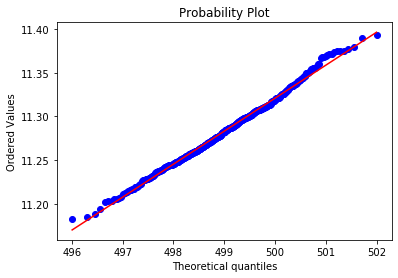

In [55]:
scipy.stats.probplot(means, 
                     sparams=(500-1), plot=plt)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

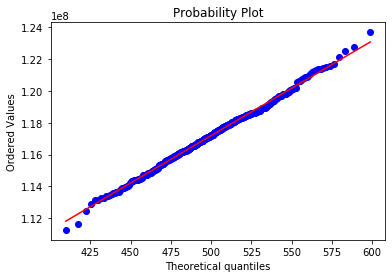

In [57]:
scipy.stats.probplot(se, dist="chi2", 
                     sparams=(500-1), plot=plt)

---

In [61]:
data_con_all = data_con.groupby(['userID']).agg({'n_clicks': 'sum'})['n_clicks'].values
data_exp_all = data_exp.groupby(['userID']).agg({'n_clicks': 'sum'})['n_clicks'].values

In [62]:
stats.mannwhitneyu(data_con_all, data_exp_all)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [65]:
data_con_all.mean(),data_exp_all.mean()

(11.287332273762974, 11.589351572215314)

---

In [70]:
p = []

for b in data['browser'].unique():
    data_con_b = data_con[data['browser'] == b].groupby(['userID']).agg({'n_clicks': 'sum'})['n_clicks'].values
    data_exp_b = data_exp[data['browser'] == b].groupby(['userID']).agg({'n_clicks': 'sum'})['n_clicks'].values
    p.append(stats.mannwhitneyu(data_con_b, data_exp_b).pvalue)

/Users/s.komissarov/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/s.komissarov/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [72]:
reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [74]:
pd.DataFrame({
    'browser': data['browser'].unique(),
    'p': p,
    'p_corrected': p_corrected,
    'reject': reject
})

,browser,p,p_corrected,reject
0,Browser #2,0.027244,0.136219,False
1,Browser #4,0.407606,0.815212,False
2,Browser #14,0.000000,0.000000,True
3,Browser #17,0.037401,0.149602,False
4,Browser #20,0.453667,0.815212,False
5,Browser #22,0.257406,0.772217,False


---

In [16]:
for b in data['browser'].unique():
    sum_con = data_con[data['browser'] == b].groupby(['userID']).agg({'n_clicks': 'sum', 'n_nonclk_queries': 'sum'}).sum()
    sum_exp = data_exp[data['browser'] == b].groupby(['userID']).agg({'n_clicks': 'sum', 'n_nonclk_queries': 'sum'}).sum()
    print('con = {} - {}'.format(b, sum_con['n_nonclk_queries'] / sum_con['n_clicks']))
    print('exp = {} - {}'.format(b, sum_exp['n_nonclk_queries'] / sum_exp['n_clicks']))
    print()
#     p.append(stats.mannwhitneyu(data_con_b, data_exp_b).pvalue)

/Users/s.komissarov/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/s.komissarov/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


con = Browser #2 - 0.45985080323130095
exp = Browser #2 - 0.4401179056219414

con = Browser #4 - 0.4681100531287727
exp = Browser #4 - 0.4310766339784418

con = Browser #14 - 0.7781343344802127
exp = Browser #14 - 0.41980472304078004

con = Browser #17 - 0.2843190918225035
exp = Browser #17 - 0.2914696659594044

con = Browser #20 - 0.34771599445765106
exp = Browser #20 - 0.32703438883214164

con = Browser #22 - 0.3585660540343938
exp = Browser #22 - 0.3449268982351694



In [11]:
sum_con['n_clicks']

n_clicks            858666
n_nonclk_queries    296177
dtype: int64